# **주성분 분석(PCA, Principal Component Analysis)**

- 대표적인 차원 축소 알고리즘
  - 차원 축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이는 것
- 데이터에 있는 분산이 큰 방향을 찾는 것
  - 분산이 큰 방향 : 데이터를 가장 잘 표현하는 벡터 -> **주성분**
- 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 축소한다
  - 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타낸다
  - 주성분은 원본 특성의 개수만큼 찾을 수 있다
- sklearn.decompostition 패키지의 PCA 클래스
  - n_components : 주성분의 개수를 지정
  - components_ : 찾은 주성분이 저장됨


### **문제 정의**
- 앞선 예제에서 사용한 과일 이미지들이 너무 많아서 차원 축소를 진행

In [1]:
# 데이터 가져오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2024-02-09 05:48:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-02-09 05:48:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-02-09 05:48:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
# PCA 학습
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

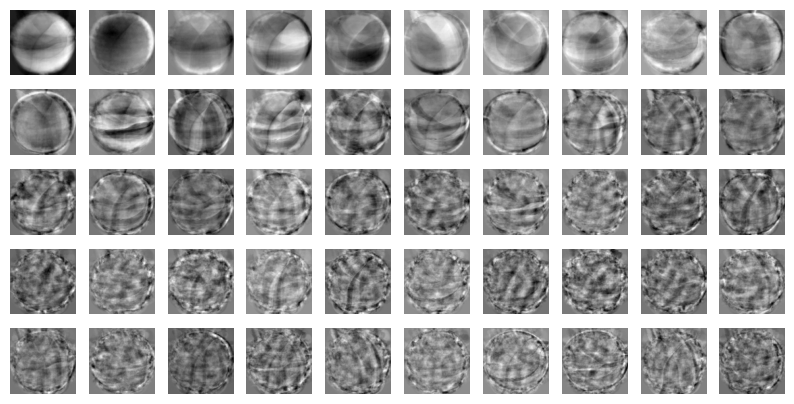

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
# 주성분을 찾은 다음 원본 데이터를 주성분에 투영하여 특성을 10,000개에서 50개로 줄일 수 있다(차원 축소)
# 원본 데이터를 각 주성분으로 분해하는 것이라고 생각
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## **원본 데이터 재구성**
- 차원을 축소하면 어느정도 손실이 발생함
- 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있음
- inverse_transform()을 이용하여 복원

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


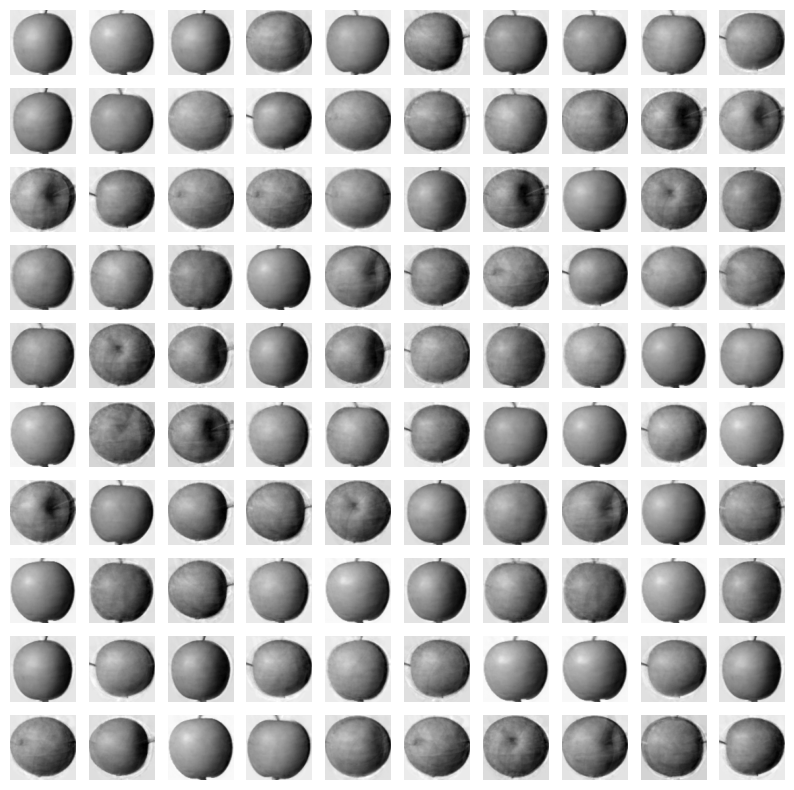

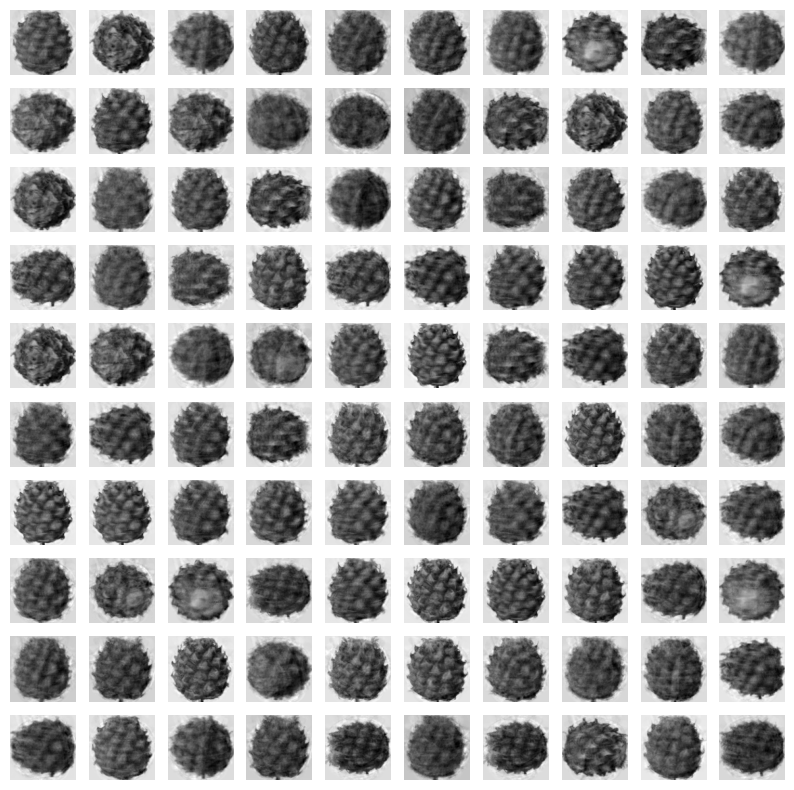

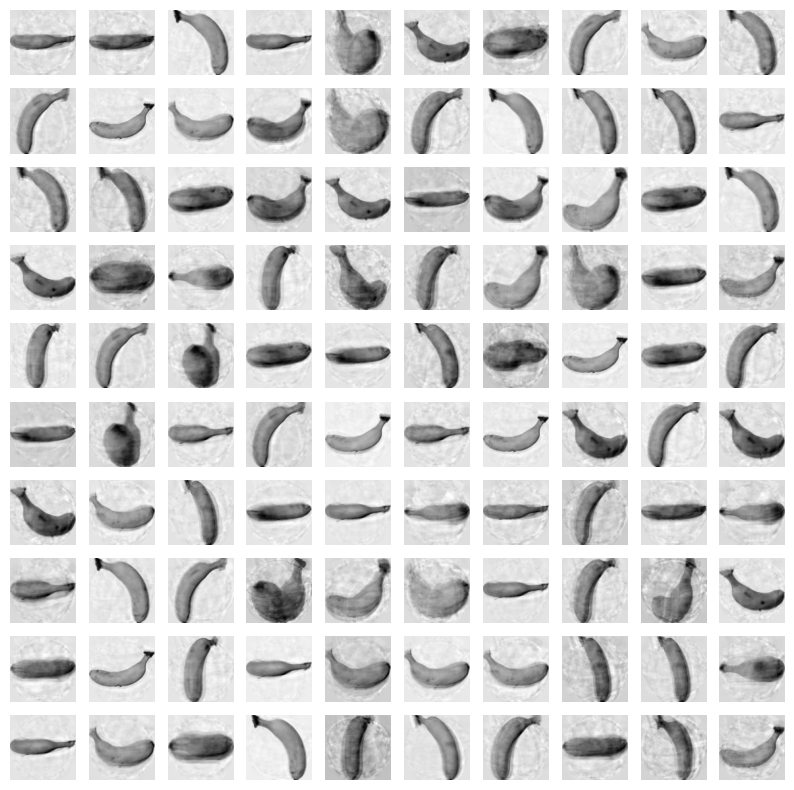

In [13]:
# 데이터를 100개씩 나누어 복원 확인
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

## **설명된 분산(explained variance)**
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
  - explained_variance_ratio_ : 각 주성분이 설명된 분산 비율이 기록되어있음
  - 첫번째 분산이 가장 큼
  - 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [14]:
# 설명된 분산 비율 확인 -> 92% (꽤 높은 비율을 가지고 있어 복원된 이미지의 품질이 높았던 것!)
print(np.sum(pca.explained_variance_ratio_))

0.9215166582189128


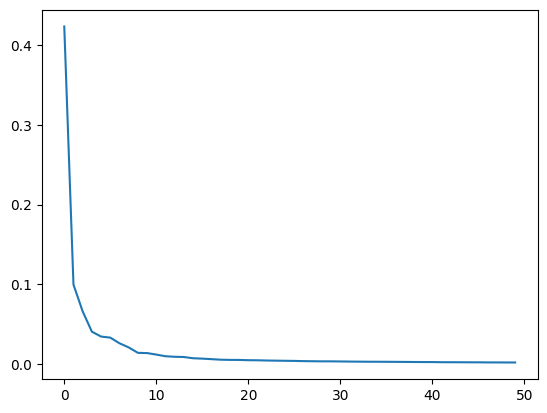

In [15]:
# 분산 비율을 시각화하여 적절한 주성분의 개수를 찾아보기
# 처음 10개가 가장 잘 표현
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [16]:
# PCA로 차원 축소된 데이터로 지도 학습 훈련, 원본 데이터와 차이점 비교
# 먼저 3개의 과일 사진을 분류해야하므로 로지스틱 회귀 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
# 타깃값 설정 = {사과 : 0, 파인애플 : 1, 바나나 : 2}
target = np.array([0]*100 + [1]*100 + [2]*100)

In [21]:
# 원본 데이터 사용
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.181850051879883


In [22]:
# PCA로 축소된 데이터 사용
# 정확도는 100%, 훈련 속도도 굉장히 빨라짐
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.10168132781982422


In [23]:
# n_components에는 주성분의 개수뿐만 아니라 원하는 설명된 분산의 비율도 입력 가능
# 지정된 비율에 도달할 때까지 주성분을 찾는다
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [24]:
# 단 2개의 특성만으로 원본 데이터의 분산의 50%를 표현할 수 있다
print(pca.n_components_)

2


In [25]:
# 해당 모델로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04060802459716797


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [29]:
# K-means 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


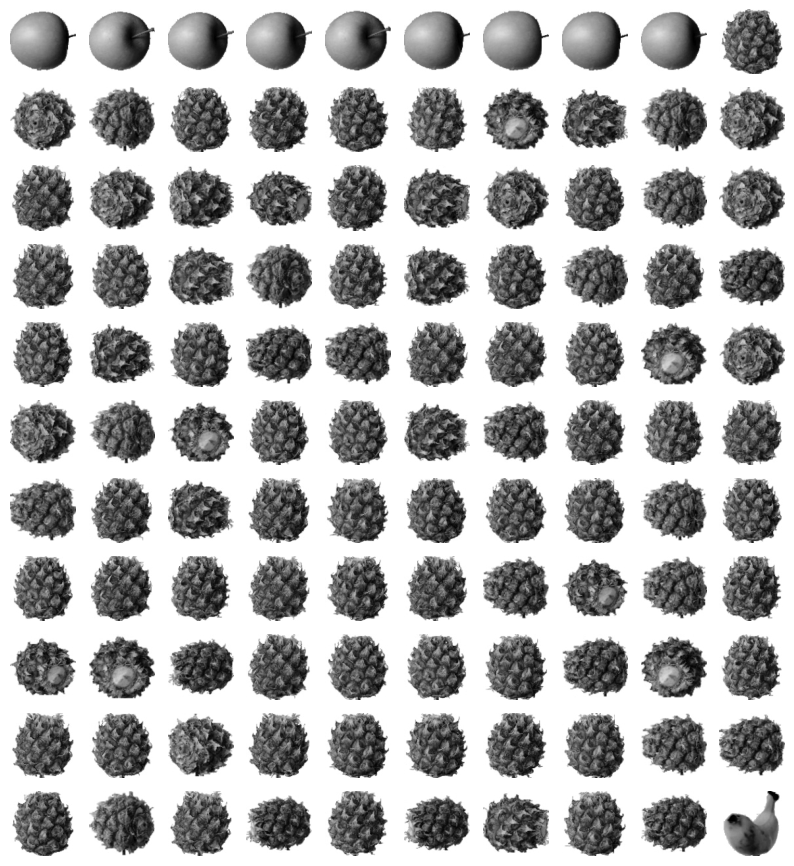

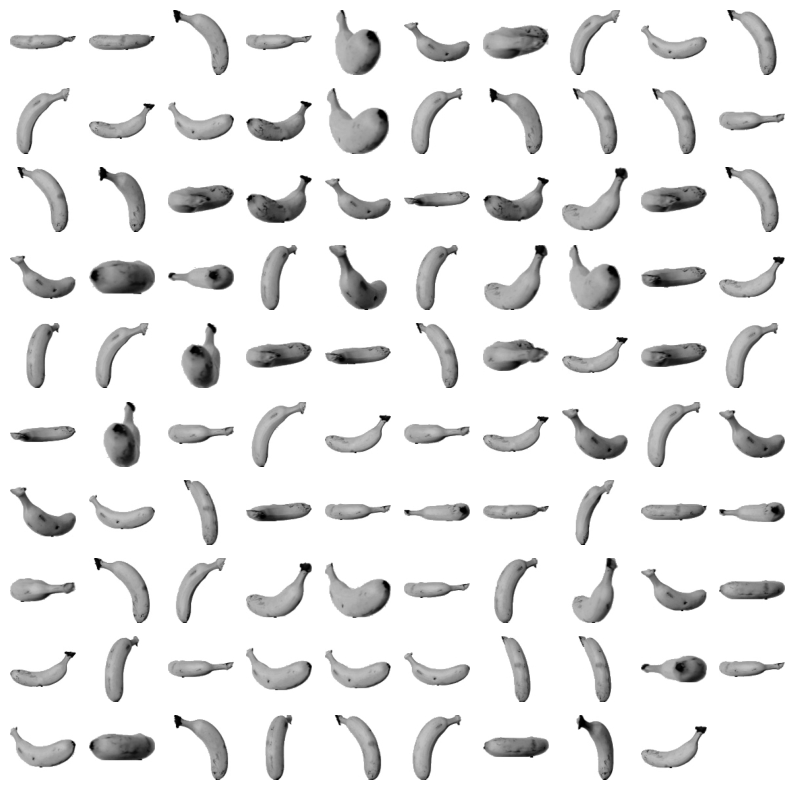

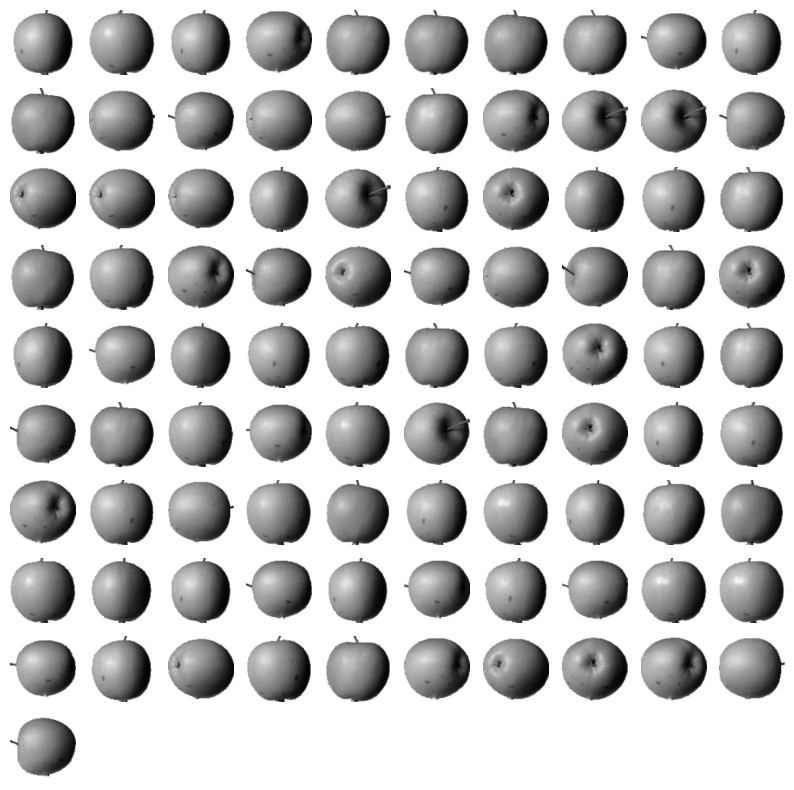

In [30]:
# k-means의 결과를 시각화
# 몇 개의 사과와 한 개의 바나나가 파인애플에 들어간 모습
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

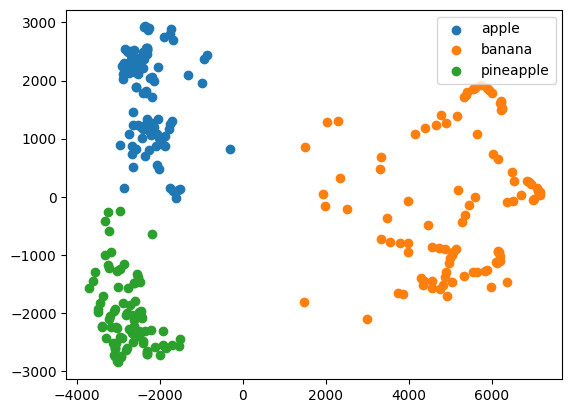

In [31]:
# 클러스터 별 산점도
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()